# Coverage using GenomeCov class (bedtools module)

<center>http://sequana.readthedocs.org</center>


Illustrative example of the Coverage module with interactive widget to see effect of the running median window length

First, let us import the functions of interest (sequana_data is optional and used to import some data from sequana)

In [4]:
%pylab inline
from sequana import GenomeCov, sequana_data

Populating the interactive namespace from numpy and matplotlib


## Read a Coverage file in BED format

In [6]:
gc = GenomeCov(sequana_data("virus.bed", "data"), low_threshold=-2, high_threshold=2)

Select one chromosome (there is only one in this case)

In [7]:
chrom = gc[0]

Compute the running median and plot the results

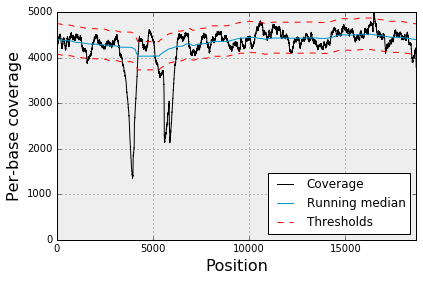

In [9]:
N = 4001
chrom.running_median(N, circular=True)
chrom.compute_zscore()
chrom.plot_coverage()

## Interactive view of the effects of the running window

In [10]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [11]:
def f(N):
    chrom.running_median(N, circular=True)
    chrom.compute_zscore()
    chrom.plot_coverage()
    ylim([1000,5500])

<function __main__.f>

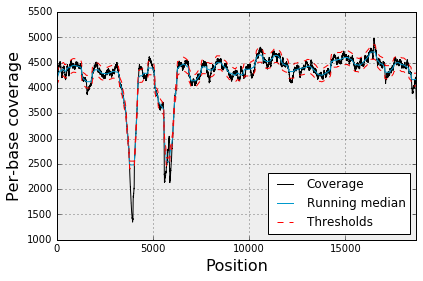

In [13]:
interact(f, N=widgets.IntSlider(min=501,max=16001, step=200))

## Region of interests

In [15]:
chrom.running_median(4101)

In [16]:
chrom.compute_zscore()

In [17]:
chrom.get_roi().get_low_roi()

,chr,start,end,size,mean_cov,mean_rm,mean_zscore,max_zscore
0,virus,3410,4193,783,2819.605364,4202.469987,-8.565504,-17.556643
3,virus,5273,6189,916,3087.579694,4154.421397,-6.701898,-12.760033
5,virus,12211,12212,1,4101.000000,4423.000000,-2.008764,-2.008764


## Some statistics

In [22]:
print(chrom)


Genome length: 18686
Sequencing depth (DOC):  4257.52 
Sequencing depth (median):  4383.50 
Breadth of coverage (BOC): 1.00 
Genome coverage standard deviation :   489.60 
Genome coverage coefficient variation :     0.11 


In [23]:
chrom.get_centralness()

0.9996253879910093

In [24]:
chrom.get_stats()

{'BOC': 1.0,
 'CV': 0.11499549840572282,
 'DOC': 4257.516429412394,
 'MAD': 126.5,
 'MAD_normed': 0.020637034218925043,
 'median': 4383.5,
 'std': 489.5952237708317}

## GC correlation

In [29]:
filename = sequana_data("JB409847.bed")
reference = sequana_data("JB409847.fasta")

gc = GenomeCov(filename)
gc.compute_gc_content(reference)

In [31]:
chrom = gc[0]
chrom.get_gc_correlation()

-0.61946655536887563

In [33]:
a = 1

test ioeosis jjioj j